# Case Study on Probability for Data Science

## Problem Statement:

**To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.**

## Introduction

**This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.**


**Mushroom classification is a beginner machine learning problem and the objective is to correctly classify if the mushroom is edible or poisonous by it’s specifications like cap shape, cap color, gill color, etc. using different classifiers.**

In this case study, I have used the following classifiers to make the prediction:-

* Logistic Regression
* KNN Logistic Regression
* SVM
* Naive Bayes
* kmeans
* Random Forest Classifier

**The dataset contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc.**

## Feature Description

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 

• bruises: bruises=t, no=f

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=n 

• gill-spacing: close=c, crowded=w, distant=d 

• gill-size: broad=b, narrow=n 

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y

• stalk-shape: enlarging=e, tapering=t 

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 

• veil-type: partial=p, universal=u

• veil-colour: brown=n, orange=o, white=w, yellow=y 

• ring-number: none=n, one=o, two=t

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z 

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y 

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns

In [21]:
# Read the Mushroom data
pd.set_option('display.max_columns', None)
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
#let's check the size of our data
df.shape

(8124, 23)

In [4]:
df.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Preprocessing data

### Handling Missing values

In [22]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# There is no null values in the feature set 

In [8]:
# Displaying the Object type features
dtypes=df.dtypes.to_frame('Data type')
dtypes.reset_index(level=0, inplace=True)
dtypes.rename(columns = {'index':'Feature'}, inplace = True)
dtypes[dtypes['Data type'] == 'object']

,Feature,Data type
0,class,object
1,cap-shape,object
2,cap-surface,object
3,cap-color,object
4,bruises,object
5,odor,object
6,gill-attachment,object
7,gill-spacing,object
8,gill-size,object
9,gill-color,object


* **All the 23 features are Non-numeric  in  data frame.**

In [9]:
# counting unique values in each column 
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Encoding

**Label encoding**

In [25]:
# label encoding the class feature alone
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
df['class']=label_en.fit_transform(df['class'])

#### One Hot Encoding 

In [33]:
# performing one hot encoding on all features except class feature
df_onehot=df.drop(['class'],axis=1).columns
df=pd.get_dummies(df,columns=df_onehot)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 118 entries, class to habitat_w
dtypes: int64(1), uint8(117)
memory usage: 991.8 KB


## Preparing the Data

In [40]:
# Separate the data into feature data and target data (X and y, respectively)
X = df.iloc[:,1:]
y = df.iloc[:,0]

## Modelling

In [41]:
# Checking the correlation of features
corr_matrix = df.corr()
corr_matrix


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,0.095454,0.088677,0.067544,-0.030910,0.097112,-0.046456,-0.044360,0.034702,-0.042854,-0.042854,-0.133683,0.113014,0.501530,-0.501530,-0.219529,0.161278,0.623842,-0.219529,0.069159,-0.785557,0.186984,0.286360,0.286360,-0.129200,0.129200,0.348387,-0.348387,-0.540024,0.540024,0.538808,-0.105491,0.120285,0.150694,-0.149641,-0.288943,-0.085962,-0.050380,0.056426,-0.195359,-0.231316,-0.046828,0.102019,-0.102019,0.302001,0.017712,-0.218548,-0.202839,-0.150087,-0.119503,0.587658,-0.491314,-0.016198,-0.136782,0.573524,-0.425444,-0.081674,0.245662,0.069159,-0.105491,-0.266489,0.233164,-0.150087,0.230277,-0.217740,0.032545,0.245662,0.069159,-0.105491,-0.266489,0.203966,-0.150087,0.230277,-0.214112,0.056426,NaN,-0.105491,-0.105491,0.140541,0.032545,0.069159,0.182101,-0.204600,0.223286,-0.074371,0.451619,0.069159,-0.540469,-0.074371,0.490229,-0.396832,-0.416645,-0.074371,0.098024,-0.074371,0.357384,-0.074371,-0.214871,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_b,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,0.010011,-0.017912,-0.115505,-0.069760,-0.084902,0.016231,-0.010782,-0.010782,0.212380,0.117981,-0.115686,0.115686,0.262455,-0.037764,-0.146074,0.262455,-0.016194,-0.000314,-0.043783,-0.067052,-0.067052,0.122896,-0.122896,-0.039406,0.039406,0.148449,-0.148449,-0.126163,-0.026543,0.122587,-0.076382,0.101547,0.034751,0.075558,-0.070747,0.105523,-0.061628,0.084884,0.064095,0.277873,-0.277873,0.016347,-0.180976,0.482914,-0.097062,-0.037764,-0.065536,-0.089730,0.113938,0.046155,-0.068543,-0.095534,0.126883,-0.005266,-0.057522,-0.016194,-0.026543,-0.067052,-0.049229,0.131922,-0.132818,0.161500,0.026622,-0.057522,-0.016194,-0.026543,-0.067052,-0.045272,0.131922,-0.132818,0.157391,0.046155,NaN,0.092724,0.092724,-0.134710,0.026622,-0.016194,-0.201139,0.210701,-0.163553,-0.018713,-0.105748,-0.016194,0.237666,0.065370,-0.121699,0.030409,0.038235,0.065370,0.183315,-0.018713,-0.024592,0.065370,-0.054064,0.024358,0.381

### Implementation: Training and Testing Data Split

next step, we split the data (both features and corresponding labels) into training and test sets

In [42]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2405063291, random_state=42)

### 1. Random Forest

Random forest algorithm is suitable for both classifications and regression task.It gives a higher accuracy through cross validation.Random forest classifier can handle the missing values and maintain the accuracy of a large proportion of data.If there are more trees, it doesn’t allow over-fitting trees in the model.It has the ability to work upon a large data set with higher dimensionality.

### 2.XGBoost

XGBoost is an implementation of Gradient Boosted decision trees.In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems. 

### 3. Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges.In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well .


### 4. Logistic Regression

Logistic regression is a classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data.


### 5. K-NN

K- Nearest Neighbors or also known as K-NN belong to the family of supervised machine learning algorithms which means we use labeled (Target Variable) dataset to predict the class of new data point. The K-NN algorithm is a robust classifier which is often used as a benchmark for more complex classifiers such as Artificial Neural Network (ANN) or Support vector machine (SVM).


### 6.Kmeans

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

### 7.Naive Baye's Classifier

Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object .here, i have used two naive Bayes classifiers.which are: 

1.**Bernoulli Naive Bayes**: In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document).

2.**Gaussian Naive Bayes classifier**: In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution.

## Model Application

In [43]:
# Import the  supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LogisticRegression as LR
# Importing confusion_matrix from sklearn.metrics as CM
from sklearn.metrics import confusion_matrix as CM
# Importing classification_report from sklearn.metrics as CR
from sklearn.metrics import classification_report as CR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Random Forest

In [48]:
# fitting model on traning data and predict on the test data and measure the accuracy
RFCModel = RFC(n_estimators=200,max_depth=50,random_state=42,criterion='entropy')
RFCModel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=200,
                       random_state=42)

In [52]:
# finding the feature importance in Random forest model
feature_importance=pd.Series(RFCModel.feature_importances_,index=X.columns).sort_values(ascending=False)*100
feature_importance.head(25)

odor_n                        13.250191
odor_f                         7.576295
gill-size_n                    5.109885
stalk-surface-below-ring_k     4.731139
gill-size_b                    4.201750
gill-color_b                   4.077136
stalk-surface-above-ring_k     3.991855
spore-print-color_h            3.809918
ring-type_p                    2.667626
population_v                   2.550730
bruises_f                      2.543105
stalk-root_b                   2.131849
bruises_t                      2.097428
gill-spacing_w                 2.070663
stalk-shape_t                  1.814852
ring-type_l                    1.807338
odor_p                         1.726684
stalk-surface-above-ring_s     1.700726
spore-print-color_w            1.638082
stalk-shape_e                  1.497482
gill-spacing_c                 1.446762
habitat_d                      1.283963
spore-print-color_r            1.194840
stalk-surface-below-ring_s     1.140520
stalk-color-below-ring_w       1.121341


**choosing the higher feature importanced features and assigning to the variable X for making the prediction better.**

In [53]:
# Taking X and y 
X=df[['odor_n','odor_f','stalk-surface-below-ring_k','gill-size_n','gill-size_b','gill-color_b','stalk-surface-above-ring_k','spore-print-color_h','ring-type_p','population_v','bruises_f','stalk-root_b','bruises_t','gill-spacing_w','stalk-shape_t','ring-type_l','odor_p','stalk-surface-above-ring_s','spore-print-color_w','stalk-shape_e','gill-spacing_c']]
y=df.iloc[:,0]

# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.2405063291, random_state=42)

In [55]:
# fitting the model
RFCModel.fit(X_train,y_train)
# predict on the test data
y_pred=RFCModel.predict(X_test)

In [59]:
# Final status of the predictions made by the Random Forest Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       942

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

Confusion matrix of the model is:
 [[1012    0]
 [   0  942]]


In [60]:
# calculate the accuracy score
print('Accuracy on training set:', round(RFCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='micro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='micro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='micro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Precision score on test set: 1.0
Recall score on test set: 1.0
F1 score on test set: 1.0


### 2. XGBoost

[19:24:07] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature Importances :  [5.0831985e-01 1.0455013e-01 0.0000000e+00 8.4085362e-03 0.0000000e+00
 0.0000000e+00 3.7675374e-03 0.0000000e+00 1.7672180e-03 1.0990849e-03
 1.3159186e-01 1.1698506e-02 0.0000000e+00 3.4904023e-04 5.4022693e-03
 0.0000000e+00 1.8564489e-01 1.2021344e-02 2.5379563e-02 0.0000000e+00
 0.0000000e+00]


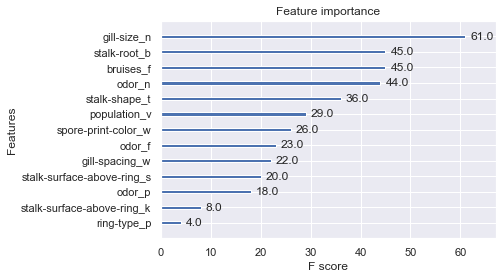

In [99]:
# fitting the model on training set and plotting a graph of feature importance in xgboost
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
print('Feature Importances : ', xgb_model.feature_importances_)

plot_importance(xgb_model)
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [62]:
# making prediction
y_pred=xgb_model.predict(X_test)


In [63]:
# Final status of the predictions made by the Random Forest Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       942

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

Confusion matrix of the model is:
 [[1012    0]
 [   0  942]]


In [64]:
# calculate the accuracy score
print('Accuracy on training set:', round(xgb_model.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='micro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='micro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='micro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Precision score on test set: 1.0
Recall score on test set: 1.0
F1 score on test set: 1.0


### 3. SVM

In [65]:
# fit model on training data

SVCModel = SVC(kernel='rbf') 
SVCModel.fit(X_train, y_train)

SVC()

In [66]:
# predict on the test data
y_pred=SVCModel.predict(X_test)

In [67]:

# Final status of the predictions made by the SV Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       942

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

Confusion matrix of the model is:
 [[1012    0]
 [   0  942]]


In [68]:
# calculate the accuracy score

print('Accuracy on training set:', round(SVCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Precision score on test set: 1.0
Recall score on test set: 1.0
F1 score on test set: 1.0


### 4. Logistic Regression

In [72]:
# fit the model on training data and predict on the test data and measure the accuracy
LRModel = LR(max_iter=3000)
LRModel.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [73]:
# predict on the test data
y_pred=LRModel.predict(X_test)

In [74]:
# Final status of the predictions made by the Logistic Regression Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1012
           1       1.00      0.99      1.00       942

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

Confusion matrix of the model is:
 [[1012    0]
 [   6  936]]


In [75]:
# calculate the accuracy score
print('Accuracy on training set:', round(LRModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Precision score on test set: 1.0
Recall score on test set: 1.0
F1 score on test set: 1.0


### 5.KNN

In [76]:
# fit the model on traning data and predict on the test data and measure the accuracy
# Checking for optimal n_neighbour value
# Importing KNeighborsClassifier from sklearn.neighbors as KNC
Accuracy_range=[]
N_range=np.arange(4,20)
for i in N_range:
    KModel=KNC(n_neighbors=i)
    KModel.fit(X_train,y_train)
    y_pred=KModel.predict(X_test)
    Accuracy_range.append(accuracy_score(y_test,y_pred))
    
print(Accuracy_range)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568, 0.9984646878198568]


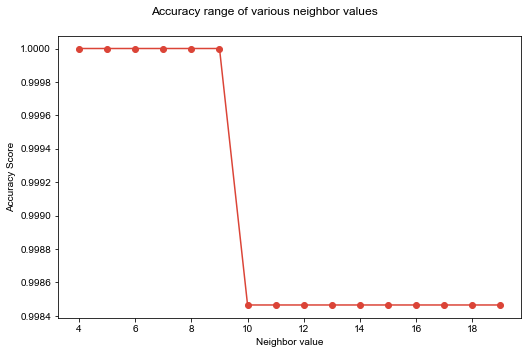

In [77]:
f, ac = plt.subplots(figsize=(7.5, 5))
f.suptitle('Accuracy range of various neighbor values')
sns.set_theme()
plt.plot( N_range, Accuracy_range, marker='o', color='#DB4437')
plt.xlabel('Neighbor value')
plt.ylabel('Accuracy Score')
f.tight_layout()
plt.show()


Selecting optimal neighbor value as '4'

In [78]:
KNCModel=KNC(n_neighbors=4)
KNCModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [79]:
# predict on the test data
y_pred=KNCModel.predict(X_test)

In [80]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       942

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

Confusion matrix of the model is:
 [[1012    0]
 [   0  942]]


In [81]:
# calculate the accuracy score
print('Accuracy on training set:', round(KNCModel.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Precision score on test set: 1.0
Recall score on test set: 1.0
F1 score on test set: 1.0


### 6.Kmeans

34165.02215657183
24411.79484516031
16777.115591590893
12566.11878240874
9320.16236208438
8135.70173186836
7204.064354993107
6296.231581751573
5594.041812985099
4854.489454107485
4227.814021433332
3761.890887646063
3547.697734288541
2993.201314401158
2670.504198804551


Text(0, 0.5, 'WCSS')

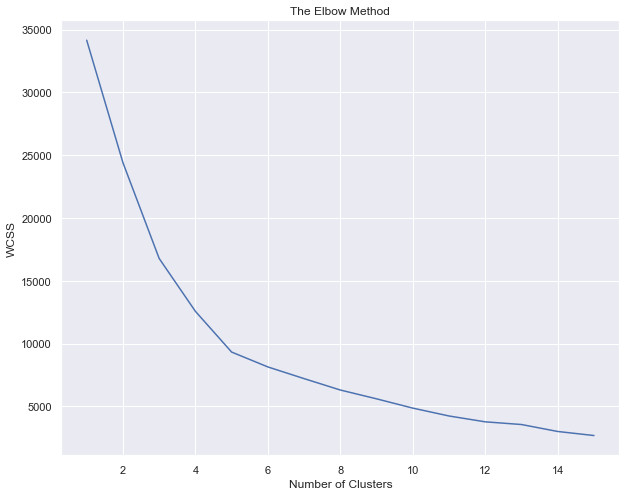

In [82]:
# Finding the kmeans.inertia_ 

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,16):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
# Plotting line graph to find the optimum number of clusters.
plt.figure(figsize=(10,8))
plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [95]:
# making Kmeans clustering model using optimum number of clusters.
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
labels_kmean=kmeans.fit_predict(X) 
print(labels_kmean)

[0 0 0 ... 0 1 0]


In [96]:
# calculating Silhouette score of KMeans clustering model
from sklearn.metrics import silhouette_score
silhouette_avg1=silhouette_score(X,labels_kmean)
print('The Silhouette score of KMeans clustering model is : ',round(silhouette_avg1,3))

The Silhouette score of KMeans clustering model is :  0.337


### 7.Naive Baye's Classifier

#### 1.Bernoulli Naive Bayes

In [100]:
# fitting the model on trained set and predicting the class
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB()
bern.fit(X_train,y_train)
y_pred=bern.predict(X_test)

In [101]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1012
           1       0.99      0.96      0.97       942

    accuracy                           0.97      1954
   macro avg       0.97      0.97      0.97      1954
weighted avg       0.97      0.97      0.97      1954

Confusion matrix of the model is:
 [[1001   11]
 [  41  901]]


In [102]:
# calculate the accuracy score
print('Accuracy on training set:', round(bern.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.97
Accuracy on test set: 0.97
Precision score on test set: 0.97
Recall score on test set: 0.97
F1 score on test set: 0.97


#### 2.Gaussian Naive Bayes classifier

In [103]:
# fitting the model on training set and making predictions
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,y_train)
y_pred=gauss.predict(X_test)

In [104]:
# Final status of the predictions made by the KNN Classifier
print(CR(y_test , y_pred))
print('Confusion matrix of the model is:\n',CM(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1012
           1       1.00      0.91      0.96       942

    accuracy                           0.96      1954
   macro avg       0.96      0.96      0.96      1954
weighted avg       0.96      0.96      0.96      1954

Confusion matrix of the model is:
 [[1012    0]
 [  81  861]]


In [105]:
# calculate the accuracy score
print('Accuracy on training set:', round(gauss.score(X_train, y_train),2))
print('Accuracy on test set:', round(accuracy_score(y_test, y_pred),2))
print('Precision score on test set:', round(precision_score(y_test, y_pred, average='macro'),2))
print('Recall score on test set:', round(recall_score(y_test, y_pred, average='macro'),2))
print('F1 score on test set:', round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy on training set: 0.96
Accuracy on test set: 0.96
Precision score on test set: 0.96
Recall score on test set: 0.96
F1 score on test set: 0.96


### Conclusion

### **From the confusion matrix, we saw that our train and test data is balanced.Most of classfication methods hit 100% accuracy with this dataset.Among them Naive Bayes classifier gives 0.97 and 0.96 accuracy in Bernoulli and Gaussian classifiers respectively.**

Submitted by :**Shameema Muneer,DSA Batch 03**